# **KNN Practice Modelling**
---

## **Overview**

In this notebook we will explore the use of **KNN Modelling** and tuning by K numbers to find optimal K numbers and **compare their performance** with **Standard Logistic Regression**. We will apply it to Hotel Bookings Dataset to try predict the classification of Cancel/Non-Cancel bookings.


**Guided Instructions:**

1. Use Hotel Bookings Dataset
2. Apply Data Cleaning
3. Aply KNN Modelling and use K 0-100  
4. Compare KNN with Best-K with Logistic Parameter (Default)
5. Use Accuracy score metrics 



**Hotel Bookings Demand Dataset**

from Kaggle: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## 1. Library & Dataset Loading 

In [2]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

pd.options.display.max_columns = 100



In [3]:
#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [20]:
#Load Dataset

df = pd.read_csv('/Users/Dwika/My Projects/Modul 3 Purwadhika/3-KNN Modelling-Practice/hotel_bookings.csv')

---

# 2. Data Cleaning & Preparation

In [21]:
#Construct deep Info on columns & values:

HotelBooking = []
for i in df.columns:
    HotelBooking.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(2).values])
pd.DataFrame(HotelBooking, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,"[City Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 0]"
2,lead_time,int64,0,0.00,479,"[177, 11]"
3,arrival_date_year,int64,0,0.00,3,"[2016, 2016]"
4,arrival_date_month,object,0,0.00,12,"[December, June]"
5,arrival_date_week_number,int64,0,0.00,53,"[11, 45]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[24, 5]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[1, 1]"
8,stays_in_week_nights,int64,0,0.00,35,"[3, 5]"
9,adults,int64,0,0.00,14,"[2, 1]"


### 2.1 Unusable columns:

- Company colunmn are unusable as 94% of the values are missing

### 2.2 Duplicated Rows

In [24]:
#Finding duplicate of rows, keeping the first
df.loc[df.duplicated(subset=None, keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [25]:
#Updating the df to only include data outside duplicated df

df = df[~df.duplicated(subset=None, keep='first')]

In [26]:
#Resetting index columns, index column created
df.reset_index(inplace=True)


In [27]:
#Dropping temporary old index column
df.drop(columns='index', inplace=True)

---

### 2.3 Data preparations

To predict classification of the cancellation status, we will only use several columns that are more likely to have impact on the prediction result.

- The target variable **(y)** will be selected from column **is_cancelled**
- The independent variable **(x)** will be selected from columns with each own reasonings:



| Column | Description | Reasoning | 
| :--- | :--- | :--- | 
| hotel | Hotel type, City/Resort | People might change their agendas of cancelling vacation and it shown by their hotel type |
| lead_time | Time between bookings and their check in day | People who planned ahead of time might be more prone to cancellation or vice versa |  
| previous_cancellations | Number of cancellations made by the guest | Suppose high cancellation number in the past are more likely to cancel |
| deposit_type | Deposit Types, (No Deposit/Non-Refund/Refundable) | Suppose people are less likely to cancel if they can't get refunds | 
| adr | assumed as Average Daily Rate | The more expensive the adr, it's possible that people are less likely to cancel | 
| booking_changes | Number of Booking Changes | More booking changes means the person is more willing to make changes to their bookings | 

All other irrelevant columns will not be used in the analysis

In [29]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [32]:
#Pick only usable columns for ML modeling in df_model
df_model = df[['is_canceled','hotel', 'lead_time', 'previous_cancellations', 'deposit_type', 'adr', 'booking_changes']]

In [33]:
#Check on df_model head
df_model.head()

,is_canceled,hotel,lead_time,previous_cancellations,deposit_type,adr,booking_changes
0,0,Resort Hotel,342,0,No Deposit,0.0,3
1,0,Resort Hotel,737,0,No Deposit,0.0,4
2,0,Resort Hotel,7,0,No Deposit,75.0,0
3,0,Resort Hotel,13,0,No Deposit,75.0,0
4,0,Resort Hotel,14,0,No Deposit,98.0,0


### 2.4 Evaluate Anomalies in Selectected data for modelling

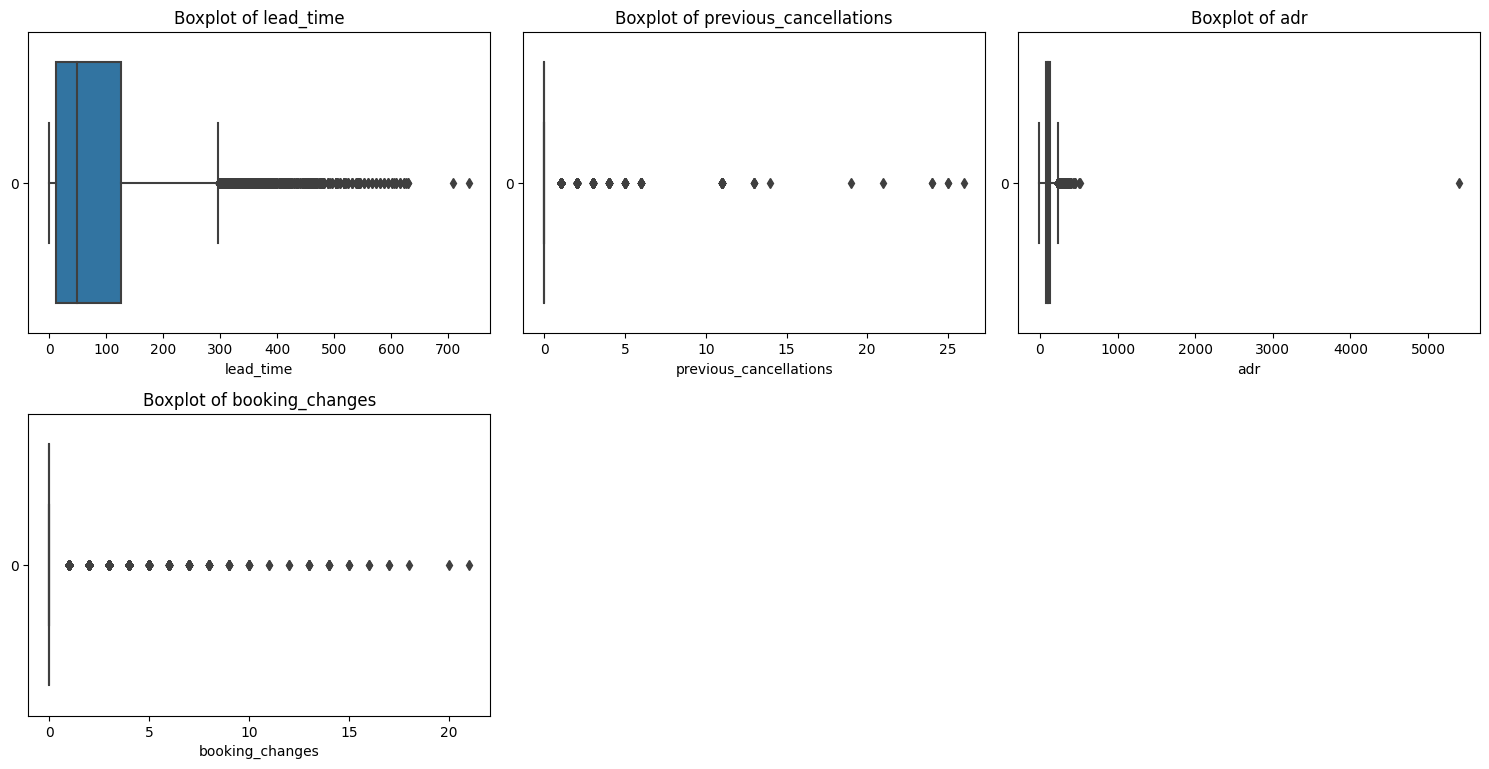

In [34]:
#Evaluate distribution in numerical columns 
numerical_cols = ['lead_time', 'previous_cancellations','adr','booking_changes']

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

From the boxplot of adr, we can spot 1 extreme outliers that have values way over 5000. 

We will drop the extreme outlier to prevent it from screwing with the classification variables.

#### 2.4.1 Find the Extreme Outlier

In [36]:
#Locate the outlier where adr > 5000
extOutlierAdr = df_model.loc[df_model['adr'] > 5000]
extOutlierAdr

,is_canceled,hotel,lead_time,previous_cancellations,deposit_type,adr,booking_changes
38749,1,City Hotel,35,0,Non Refund,5400.0,1


In [38]:
#Drop the outlier by index
df_model.drop(extOutlierAdr.index, inplace=True)

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_85713/2951197582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop(extOutlierAdr.index, inplace=True)


In [45]:
#Verify the rows are dropped
df_model[df_model['adr'] > 5000]

,is_canceled,hotel,lead_time,previous_cancellations,deposit_type,adr,booking_changes


<Axes: xlabel='adr'>

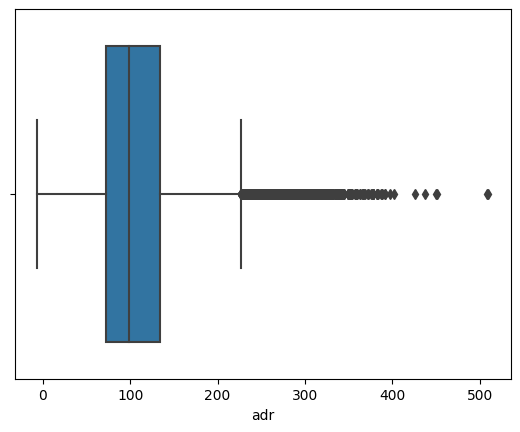

In [46]:
#Verify adr distribution by boxplot
sns.boxplot(data=df_model, x=df_model['adr'])

#### 2.4.2 Reset Index after dropping outliers

In [47]:
#Resetting Index
df_model.reset_index(drop=True, inplace=True)

## 3. Feature Engineering

In [52]:
#Check on current data features
HotelBooking = []
for i in df_model.columns:
    HotelBooking.append([i, df_model[i].dtypes,
                         df_model[i].nunique(), 
                    df_model[i].sample(2).values])
pd.DataFrame(HotelBooking, columns = ['dataFeatures', 'dataType', 'unique','uniqueSample'])

                         

,dataFeatures,dataType,unique,uniqueSample
0,is_canceled,int64,2,"[0, 1]"
1,hotel,object,2,"[Resort Hotel, City Hotel]"
2,lead_time,int64,479,"[6, 0]"
3,previous_cancellations,int64,15,"[0, 0]"
4,deposit_type,object,3,"[No Deposit, No Deposit]"
5,adr,float64,8878,"[191.11, 140.6]"
6,booking_changes,int64,21,"[0, 0]"


## 3.1 Converting Categorical Variable to Dummy with OHE

In [54]:
#Convert all categorical variables (hotel,deposit_type) into dummy numerical
df_ML =  pd.get_dummies(df_model, columns=['hotel','deposit_type'], dtype=int, drop_first=True)
df_ML

,is_canceled,lead_time,previous_cancellations,adr,booking_changes,hotel_Resort Hotel,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,0,0.00,3,1,0,0
1,0,737,0,0.00,4,1,0,0
2,0,7,0,75.00,0,1,0,0
3,0,13,0,75.00,0,1,0,0
4,0,14,0,98.00,0,1,0,0
...,...,...,...,...,...,...,...,...
87390,0,23,0,96.14,0,0,0,0
87391,0,102,0,225.43,0,0,0,0
87392,0,34,0,157.71,0,0,0,0
87393,0,109,0,104.40,0,0,0,0


**Dummy Variable Notations:**

Converted Resort Hotel Variable

Hotel | hotel_Resort Hotel | 
| --- | --- | 
| City Hotel | 0 |
| Resort Hotel | 1 |


Converted deposit_type Variable

deposit_type | deposit_type_Non Refund | deposit_type_Refundable | 
| --- | --- | --- | 
| No Deposit | 0 | 0 |
| Non Refund | 1 | 0 |
| Refundable | 0 | 1 | 


## 4. Train Test Split Data

In [56]:
#Train test split
x = df_ML.drop('is_canceled', axis=1)  # All cols except default as ind var (x)
y = df_ML['is_canceled']               # default col as target (y)

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size= 0.2,    # Test Data Size as 20% 
    random_state=20,   # Random seed
    stratify=y         # Proportion between train & test, same propotion as y 
)

- Splitted data with 20% proportion for testing and 80% for training

## 5. Build Modelling

### 5.1 Basic KNN Model

In [60]:
#Build model

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

#Print report
pred_knn = knn.predict(xtest)
print(f'KNN Accuracy Score: {round(accuracy_score(ytest,pred_knn)*100,2)} %')

KNN Accuracy Score: 69.76 %


### 5.2 KNN Model with K Values

In [90]:
#K-Values Ranges 0-100
accuracies = []
kvalues = []
k_score_dictionary = {}

for k in range(1,100, 2):
    knn_multi_k = KNeighborsClassifier(n_neighbors=k)
    knn_multi_k.fit(xtrain,ytrain) 
    #Print report
    pred_knn = knn_multi_k.predict(xtest)
    acc = accuracy_score(ytest, pred_knn)
    # print(f'KNN Accuracy Score: {round(accuracy_score(ytest,pred_knn)*100,2)} %')
    accuracies.append(acc)
    kvalues.append(k)
    # k_score_dictionary[kvalues[k]] = accuracies[k]
    
    



In [103]:
accuracies.sort(reverse=True)

None


In [104]:
accuracies

[0.7267006121631673,
 0.7260140740316952,
 0.7258424394988272,
 0.7256708049659591,
 0.7256135934550031,
 0.7253847474111791,
 0.7253847474111791,
 0.7253275359002231,
 0.7252703243892671,
 0.7252131128783111,
 0.7252131128783111,
 0.7248698438125751,
 0.7246409977687511,
 0.7245837862577951,
 0.724412151724927,
 0.723954459637279,
 0.723954459637279,
 0.7235539790605869,
 0.723496767549631,
 0.7228674409291149,
 0.7227530179072029,
 0.722695806396247,
 0.7221236912866869,
 0.7220664797757309,
 0.7218948452428628,
 0.7217804222209508,
 0.7217232107099949,
 0.7216659991990388,
 0.7210366725785228,
 0.7207506150237428,
 0.7195491732936666,
 0.7191486927169747,
 0.7189198466731507,
 0.7188054236512387,
 0.7184049430745466,
 0.7182905200526346,
 0.7176039819211626,
 0.7175467704102065,
 0.7144001373076263,
 0.7133703301104182,
 0.7123977344241661,
 0.7117111962926941,
 0.709823216431146,
 0.7083929286572458,
 0.7060472567080497,
 0.7043881228903255,
 0.6999828365467132,
 0.6975799530865611

In [92]:
kvalues

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [106]:

for i in range(len(kvalues)):
    k_score_dictionary[kvalues[i]] = accuracies[i]
 
k_score_dictionary
# k_score_dictionary
# scoring_df = pd.DataFrame(k_score_dictionary, columns=['k', 'score'])
# print(k_score_dictionary)

{1: 0.7267006121631673,
 3: 0.7260140740316952,
 5: 0.7258424394988272,
 7: 0.7256708049659591,
 9: 0.7256135934550031,
 11: 0.7253847474111791,
 13: 0.7253847474111791,
 15: 0.7253275359002231,
 17: 0.7252703243892671,
 19: 0.7252131128783111,
 21: 0.7252131128783111,
 23: 0.7248698438125751,
 25: 0.7246409977687511,
 27: 0.7245837862577951,
 29: 0.724412151724927,
 31: 0.723954459637279,
 33: 0.723954459637279,
 35: 0.7235539790605869,
 37: 0.723496767549631,
 39: 0.7228674409291149,
 41: 0.7227530179072029,
 43: 0.722695806396247,
 45: 0.7221236912866869,
 47: 0.7220664797757309,
 49: 0.7218948452428628,
 51: 0.7217804222209508,
 53: 0.7217232107099949,
 55: 0.7216659991990388,
 57: 0.7210366725785228,
 59: 0.7207506150237428,
 61: 0.7195491732936666,
 63: 0.7191486927169747,
 65: 0.7189198466731507,
 67: 0.7188054236512387,
 69: 0.7184049430745466,
 71: 0.7182905200526346,
 73: 0.7176039819211626,
 75: 0.7175467704102065,
 77: 0.7144001373076263,
 79: 0.7133703301104182,
 81: 0.712

In [97]:
scoring_df

,k,score


In [87]:
accuracies

AttributeError: 'list' object has no attribute 'plot'

In [85]:
kvalues

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [77]:
accuracies

[0.7151438869500544,
 0.7144001373076263,
 0.7138280221980663,
 0.7142285027747582,
 0.7141140797528462,
 0.7137708106871102,
 0.7169174437896905,
 0.7177756164540305,
 0.7177184049430746,
 0.7175467704102065,
 0.7187482121402826,
 0.7184621545855026,
 0.7210366725785228,
 0.7216087876880829,
 0.7218948452428628,
 0.7208078265346988,
 0.7208078265346988,
 0.7218376337319069,
 0.7216659991990388,
 0.7226385948852909,
 0.723668402082499,
 0.722695806396247,
 0.7222953258195549,
 0.7229818639510269,
 0.723382344527719,
 0.7221809027976429,
 0.7229818639510269,
 0.723725613593455,
 0.7246982092797071,
 0.723782825104411,
 0.7245837862577951,
 0.7254419589221351,
 0.7244693632358831,
 0.7248126323016191,
 0.7244693632358831,
 0.7246982092797071,
 0.7254419589221351,
 0.7256708049659591,
 0.7256708049659591,
 0.7251559013673551,
 0.7251559013673551,
 0.7258996510097832,
 0.7256135934550031,
 0.7258996510097832,
 0.7264145546083872,
 0.7258996510097832,
 0.7259568625207392,
 0.726014074031695

### 5.3 Logistic Regression Model

In [76]:
df[['arrival_date_year','arrival_date_day_of_month','arrival_date_month' ]]

,arrival_date_year,arrival_date_day_of_month,arrival_date_month
0,2015,1,July
1,2015,1,July
2,2015,1,July
3,2015,1,July
4,2015,1,July
...,...,...,...
87391,2017,30,August
87392,2017,31,August
87393,2017,31,August
87394,2017,31,August


In [77]:
# Merging datetime columns
df['arrival_date'] = pd.to_datetime(df['arrival_date_day_of_month'].astype(str)+df['arrival_date_month']+df['arrival_date_year'].astype(str), format='%d%B%Y')


In [83]:
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'adr', 'reservation_status', 'reservation_status_date',
       'arrival_date'],
      dtype='object')

In [87]:
# Rearrange columns
# df = df.reindex(columns=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
#        'arrival_date_month', 'arrival_date_week_number',
#        'arrival_date_day_of_month', 'stays_in_weekend_nights',
#        'stays_in_week_nights', 'adults', 'country', 'market_segment',
#        'distribution_channel', 'reserved_room_type', 'assigned_room_type',
#        'deposit_type', 'adr', 'reservation_status', 'reservation_status_date',
#        'arrival_date'])

In [9]:
df.loc[df['is_repeated_guest']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [51]:
topCountry = df['country'].value_counts()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='lead_time'>

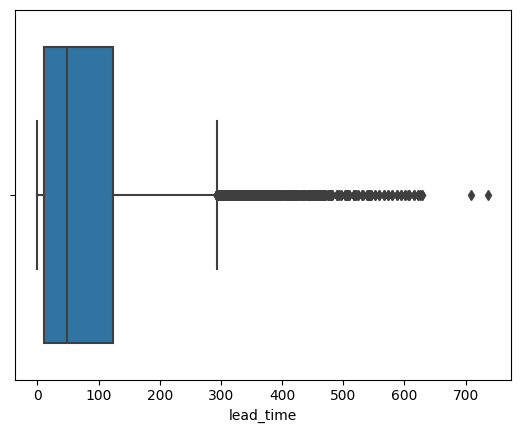

In [106]:
sns.boxplot(x=df['lead_time'])

---

## 3. Insights Exploration

### 3. Trying to get insights

Questions to be answered:

About Destinations
1. What are top 10 of favorite countries?

About time
2. What month are the most popular

About Fare/Hotel rates
3. What are the best time to travel? 
    - cheapest hotel room 
    - 
About Demographics
4. What are the most common type of people travelling

About Customer behaviour
5. What leads to customer retention --> 

### 1. Top 10 Favorite countries

<Axes: xlabel='country'>

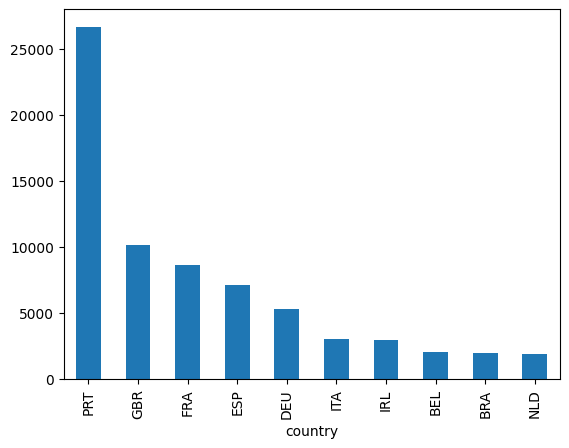

In [172]:
df['country'].value_counts().head(10).plot(kind='bar')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,adr,reservation_status,reservation_status_date,arrival_date


In [194]:
df[['country','adr']].groupby(df['country'])

### 2. On the most popular country, what are the mean of rates (adr), lead-time & total number of stays

In [138]:
#Most Favorite country = PRT

favCountry = df['country'] == 'PRT'
# df.loc[favCountry]

<Axes: >

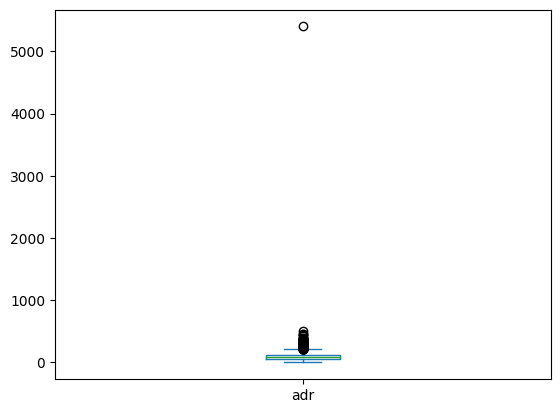

In [121]:
#Check the distribution of rate
df[favCountry]['adr'].plot(kind='box')

In [137]:
df.loc[df['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,adr,reservation_status,reservation_status_date,arrival_date
37683,City Hotel,1,35,2016,March,13,25,0,1,2,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,5400.0,Canceled,2016-02-19,2016-03-25


<Axes: >

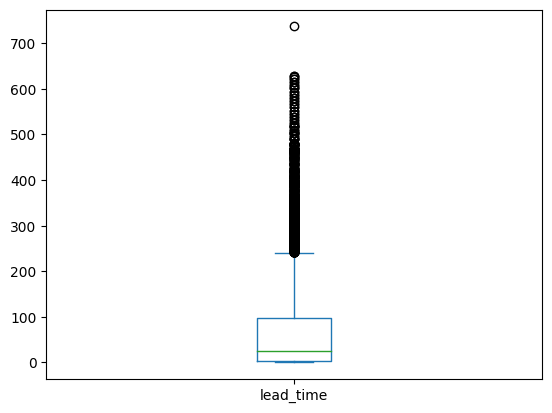

In [141]:

#Check the distribution of lead time
df[favCountry]['lead_time'].plot(kind='box')


sns.

In [142]:
print(f" Rata rata ADR pada negara dengan visitasi tertinggi adalah :{df[favCountry]['adr'].median()} $")
print(f" Rata rata lead-time pada negara dengan visitasi tertinggi adalah :{df[favCountry]['lead_time'].median()} hari")



 Rata rata ADR pada negara dengan visitasi tertinggi adalah :86.0 $
 Rata rata lead-time pada negara dengan visitasi tertinggi adalah :25.0 days


<Axes: ylabel='Frequency'>

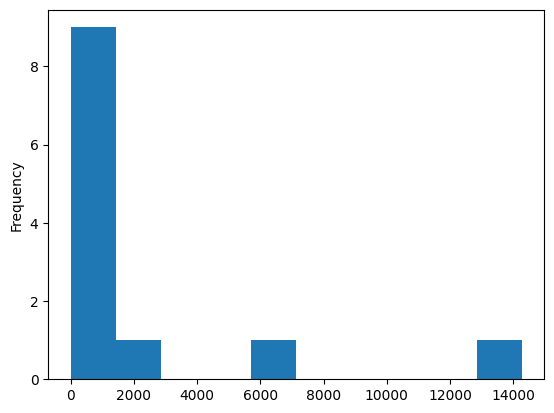

In [177]:
df.loc[favCountry]['assigned_room_type'].value_counts().plot(kind='hist')

<Axes: ylabel='count'>

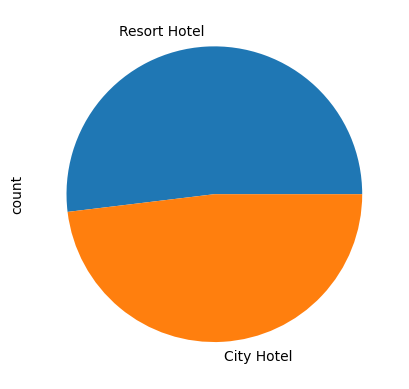

In [176]:
df.loc[favCountry]['hotel'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

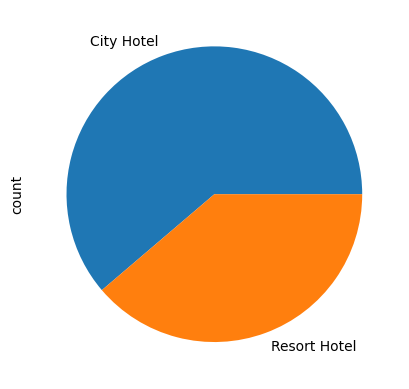

In [178]:
df['hotel'].value_counts().plot(kind='pie')

## 2. Feature by time

### 2.a Months per values

<Axes: xlabel='arrival_date'>

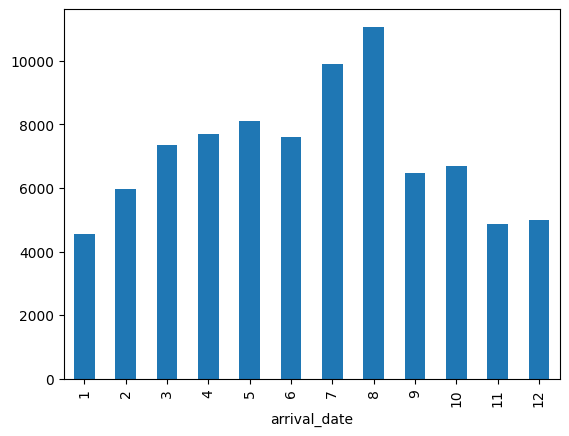

In [191]:
df['arrival_date'].dt.month.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='arrival_date_month', ylabel='Count'>

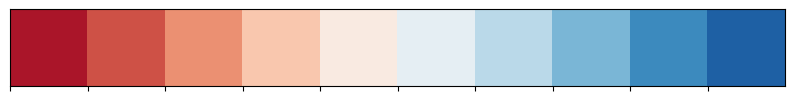

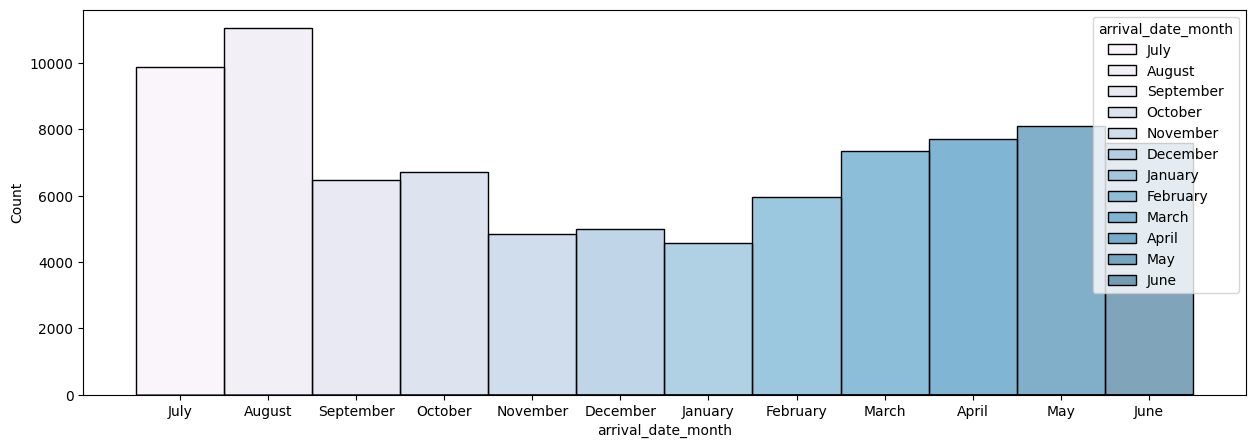

In [226]:
sequential_colors = sns.color_palette("PuBu", 12)
sns.palplot(diverging_colors)
plt.figure(figsize = ( 15 , 5 ))
sns.histplot(x=df['arrival_date_month'], hue=df['arrival_date_month'], palette=sequential_colors)

In [240]:
groupMonth = df.groupby(['arrival_date_month'])

groupMonth['arrival_date_month'].value_counts()

arrival_date_month
April         7698
August       11065
December      4988
February      5975
January       4563
July          9886
June          7606
March         7340
May           8120
November      4854
October       6702
September     6479
Name: count, dtype: int64

## Top 10 Highest Average Daily Rate grouped By Country 

<Axes: xlabel='country'>

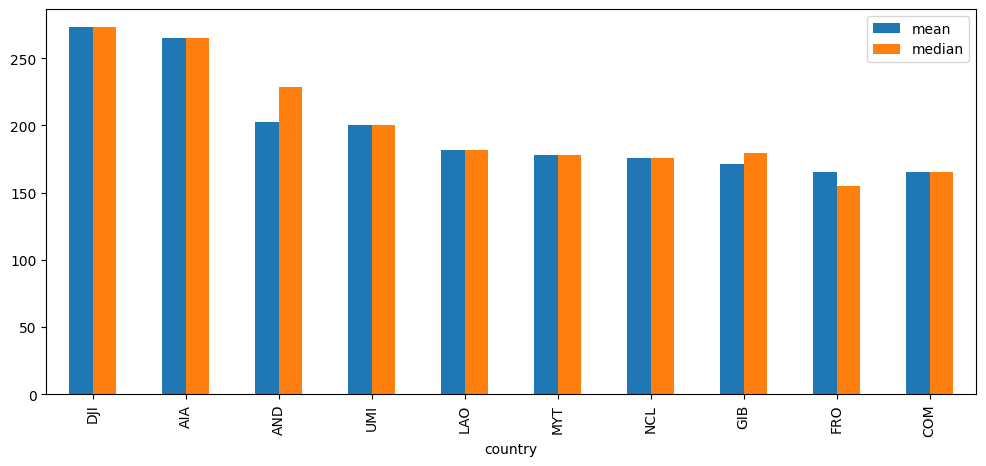

In [265]:
countryGroup = df.groupby(['country'])
countryGroup['adr'].agg(['mean', 'median']).sort_values('mean', ascending=False).head(10).plot(kind='bar', figsize=(12,5))

<Axes: xlabel='country'>

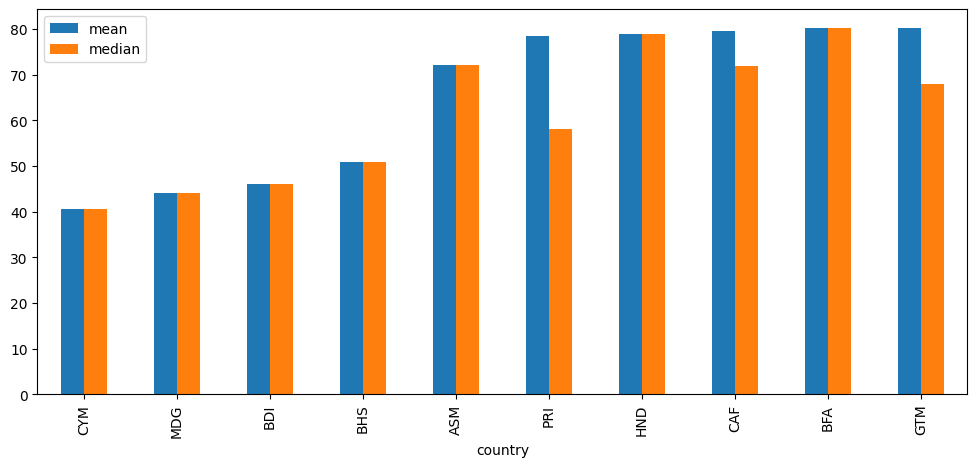

In [266]:
countryGroup = df.groupby(['country'])
countryGroup['adr'].agg(['mean', 'median']).sort_values('mean', ascending=True).head(10).plot(kind='bar', figsize=(12,5))

In [245]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,adr,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,PRT,Direct,Direct,0,C,C,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,PRT,Direct,Direct,0,C,C,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,GBR,Direct,Direct,0,A,C,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,GBR,Corporate,Corporate,0,A,A,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,GBR,Online TA,TA/TO,0,A,A,No Deposit,98.0,Check-Out,2015-07-03,2015-07-01


<Axes: xlabel='arrival_date_month'>

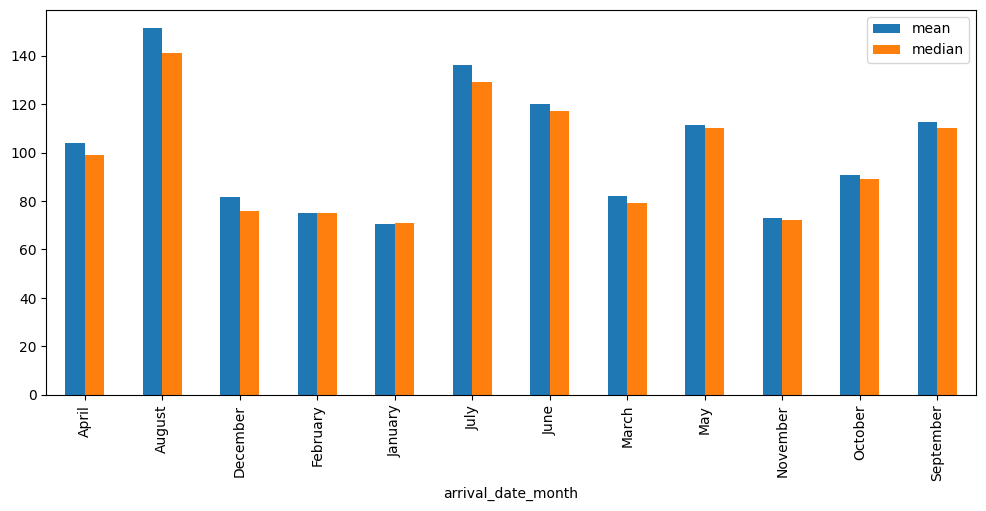

In [270]:

groupMonth['adr'].agg(['mean', 'median']).plot(kind='bar', figsize=(12,5))